## Модель бинарной классификации для предсказания вероятности клика (CTR) на рекламное объявление

_____
**Описание исследования**

Рекламная платформа сталкивается с проблемой неэффективного расходования бюджета из-за искаженных оценок вероятности клика (CTR). Поскольку алгоритмы автоматических ставок опираются на точные вероятности, любые отклонения предсказаний от реального поведения пользователей приводят к финансовым потерям. Нужно построить модель бинарной классификации для прогнозирования CTR с обязательным этапом калибровки, что позволит привести предсказанные вероятности в соответствие с фактической частотой кликов и оптимизировать стратегии закупок рекламы.
_____
**Цель исследования**

- Построить модель бинарной классификации для прогнозирования CTR.
- Целевая переменная: click (бинарный признак, указывающий, был ли совершён клик по баннеру).
- В качестве метрики будет использоваться: Precision-Recall AUC (основная метрика для несбалансированных данных). Log Loss для оценки точности предсказанных вероятностей. Оценка Бриера для измерения и точности, и калибровки модели.
- Решение должно быть готово к промышленной эксплуатации, поэтому будет сохранен воспроизводимый Pipeline модели.
_____
**Задачи исследования**

- Изучение данных и предобработка.
- Отбор признаков.
- Обучение базовых моделей классификации.
- Калибровка вероятностей.
- Оценка и анализ результатов.
- Подготовка артефактов.

_____
**Исходные данные**

Идентификаторы и временные метки:
- id — уникальный идентификатор записи о показе баннера;
- hour — час, в который был показан баннер, в формате YYMMDDHH.

Характеристики рекламной площадки ( Site ):
- site_id — идентификатор веб-сайта, на котором был показан баннер;
- site_domain — домен веб-сайта;
- site_category — тематическая категория веб-сайта.

Характеристики рекламируемого приложения ( App ):
- app_id — идентификатор рекламируемого мобильного приложения;
- app_domain — домен рекламируемого приложения;
- app_category — категория рекламируемого приложения.

Характеристики устройства и соединения пользователя:
- device_id — идентификатор браузера или устройства;
- device_ip — IP-адрес устройства;
- device_model — модель устройства;
- device_type — тип устройства пользователя: например, смартфон, планшет, ПК;
- device_conn_type — тип сетевого соединения устройства: например, Wi-Fi, 3G, 4G.

Характеристики рекламного баннера и аукциона:
- banner_pos — позиция баннера на веб-странице;
- C1 — анонимизированный признак, характеризующий контекст показа;
- C14 — C21 — группа анонимизированных признаков, описывающих параметры баннера, пользователя или аукциона.

Машинно-сгенерированные признаки (ML Features):
- ml_feature_1, ml_feature_3 — ml_feature_6, ml_feature_8 — ml_feature_10 — числовые признаки, полученные в результате предварительной обработки и генерации новых признаков;
- ml_feature_2, ml_feature_7 — категориальные признаки, полученные в результате предварительной обработки и генерации новых признаков.

Целевая переменная:
- click — бинарный признак, указывающий, был ли совершён клик по баннеру. 1 — клик был, 0 — клика не было.
______

**Данное исследование разделим на несколько частей**

***Часть 0. Постановка задачи машинного обучения:***
* [1. Формулировка задачи](#1-bullet)

***Часть 1. Подключение, настройка библиотек и загрузка датасета:***
* [1. Загрузка и импорт библиотек](#2-bullet)
* [2. Фиксация глобальных констант](#3-bullet)
* [3. Извлечение данных из датасета](#4-bullet)

***Часть 2. Первичный анализ данных***
* [1. Анализ данных пользователей и их вовлеченности](#5-bullet)
* [2. Обработка некорректных типов и понижение размерности pandas датасета](#6-bullet)
* [3. Вывод по данными датасета](#7-bullet)
* [4. Анализ целевой переменной](#8-bullet)
* [5. Удаление признаков](#9-bullet)
* [6. Удаление явных дубликатов](#10-bullet)
* [7. Обработка пропусков](#11-bullet)
* [8. Анализ категориальных признаков](#12-bullet)
* [9. Анализ выбросов](#13-bullet)
* [10. Визуализация корреляций](#14-bullet)
* [11. Итог EDA анализа](#15-bullet)

***Часть 3. Предобработка данных***
* [1. Обработка признаков основного датафрейма](#16-bullet)
* [2. Разбиение данных на выборки](#17-bullet)
* [3. Набор функций для регулирования Pipeline](#18-bullet)
* [4. Создание базового конфига](#19-bullet)

***Часть 4. Обучение модели***
* [1. Фиксация числа итераций кроссвалидации](#20-bullet)
* [2. Создание Dummy модели для получения нижней границы всех моделей](#21-bullet)
* [3. Создание базовой модели без новых признаов](#22-bullet)
* [4. Проверка модели без обработки пропусков](#23-bullet)
* [5. Проверка гипотеза по параметру app_crashes_last_month](#24-bullet)
* [6. Попытка удаления признаков без корреляций](#25-bullet)
* [7. Вывод по результатам обучения моделей](#26-bullet)

***Часть 5. Создание новых признаков***
* [1. Синтезирование новых признаков](#27-bullet)
* [2. Итоговая модель](#28-bullet)

***Часть 6. Эксперименты с гиперпараметрами***
* [1. Перебор гиперпараметров через Grid Search Cross Validate](#29-bullet)
* [2. Вывод топ-5 лучших моделей с их метриками и гиперпараметрами](#30-bullet)

***Часть 7. Подготовка финальной модели***
* [1. Вывод лучших гиперпараметров](#31-bullet)
* [2. Функция для визуализации итогового результата](#32-bullet)
* [3. Финальная проверка модели на тестовой выборке](#33-bullet)

***Часть 8. Отчёт о проделанной работе***
* [1. Выводы](#34-bullet)

***Часть 9. Сохранение модели для продакшена***
* [1. Локальное сохранение модели](#35-bullet)
* [2. Сервис на основе обученной модели](#36-bullet)
* [3. Тестирование модели и сервиса на данных датасета](#37-bullet)
* [4. Ссылка для скачивания сохранённой модели](#38-bullet)

# Структура проекта

## 1. Подготовка среды и загрузка данных

#### 1.1 Подготовка библиотек

Установка библиотек

In [88]:
from pathlib import Path

req_path = Path("../../requirements.txt")
if req_path.exists():
    %pip install -qr {req_path}
else:
    %pip install -qU scikit-learn numpy pandas matplotlib seaborn phik jinja2 joblib category_encoders

Note: you may need to restart the kernel to use updated packages.


Импорт библиотек

In [89]:
import joblib
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix
from category_encoders import TargetEncoder

import sklearn
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_predict, learning_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_recall_curve, classification_report, confusion_matrix

from IPython.display import display

pd.set_option('display.max_columns', None)

#### 1.2 Фиксация констант для воспроизводимости

In [90]:
RANDOM_SEED=42

#### 1.3 Загрузка данных

In [91]:
pth1 = Path('click_dataset.csv')
pth2 = Path('/datasets/ds_s16_ad_click_dataset.csv')

if pth1.exists():
    original_df = pd.read_csv(pth1, sep=',', decimal='.')
elif pth2.exists():
    original_df = pd.read_csv(pth2, sep=',', decimal='.')
else:
    raise "Путь до датасета неверный"

In [92]:
original_df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,ml_feature_1,ml_feature_2,ml_feature_3,ml_feature_4,ml_feature_5,ml_feature_6,ml_feature_7,ml_feature_8,ml_feature_9,ml_feature_10
0,1.005263e+19,1,14102100,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,488a9a3e,31025cda,1,0,17614,320,50,1993,2,1063,-1,33,-0.996823,A,0.666588,0,0.817292,0.993275,Z,-0.619959,0.433666,0.274038
1,1.010597e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,75bb1b58,2ee63ff8,1,0,15701,320,50,1722,0,35,-1,79,-0.391309,C,5.146789,1,-0.883865,-0.825722,X,0.576526,-0.318558,-0.132851
2,1.012048e+19,0,14102100,1005,0,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,285263b0,d780319b,1,0,17914,320,50,2043,2,39,100084,32,-2.112732,D,7.169348,0,-0.859440,-0.338365,Y,-0.440047,-0.345412,0.340487
3,1.021995e+18,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,39cfef32,d9b5648e,0f2161f8,a99f214a,18190986,f4fffcd0,1,0,21611,320,50,2480,3,297,100111,61,0.332707,A,-0.290708,1,0.062795,0.062934,Y,0.551982,0.733382,-0.198542
4,1.023455e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b66e5482,a0f5f879,1,0,15702,320,50,1722,0,35,100084,79,1.166623,A,6.319134,1,-0.675276,0.797144,X,0.640827,0.297955,-0.136909


In [93]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50000 non-null  float64
 1   click             50000 non-null  int64  
 2   hour              50000 non-null  int64  
 3   C1                50000 non-null  int64  
 4   banner_pos        50000 non-null  int64  
 5   site_id           50000 non-null  object 
 6   site_domain       50000 non-null  object 
 7   site_category     50000 non-null  object 
 8   app_id            50000 non-null  object 
 9   app_domain        50000 non-null  object 
 10  app_category      50000 non-null  object 
 11  device_id         50000 non-null  object 
 12  device_ip         50000 non-null  object 
 13  device_model      50000 non-null  object 
 14  device_type       50000 non-null  int64  
 15  device_conn_type  50000 non-null  int64  
 16  C14               50000 non-null  int64 

#### 1.4 Понижение размерности pandas датасета

In [126]:
for column in [
    'id',
    'ml_feature_1',
    'ml_feature_3',
    'ml_feature_5',
    'ml_feature_6',
    'ml_feature_8',
    'ml_feature_9',
    'ml_feature_10'
]:
    original_df[column] = pd.to_numeric(original_df[column], downcast='float')
    
for column in [
    'click',
    'hour',
    'C1',
    'banner_pos',
    'device_type',
    'device_conn_type',
    'C14',
    'C15',
    'C16',
    'C17',
    'C18',
    'C19',
    'C20',
    'C21',
    'ml_feature_4',
]:
    original_df[column] = pd.to_numeric(original_df[column], downcast='integer')

## 2. Исследовательский анализ данных (EDA)

#### 2.1 Опишите базовую информацию о датасете

In [127]:
print("Число признаков:", original_df.shape[1])
print("Число объектов:", original_df.shape[0])

Число признаков: 34
Число объектов: 50000


Датасет содержит больше числовых признаков - 23. Категорильных - 11. 
- float: 8 
- int: 15
- object: 11

Данные представляют собой готовую аналитическую витрину событий показа рекламы, собранную из логов системы.
- О пользователях: известны технические характеристики их устройств (модель, тип, вид соединения, IP-адрес) и анонимизированные идентификаторы.

- О рекламе: доступна информация о площадке размещения (сайт или приложение, их домены и категории), позиции баннера, времени показа, а также набор анонимных параметров аукциона.


#### 2.2 Анализ целевой переменной

In [128]:
click_desc = original_df['click'].describe()

click_desc

count    50000.000000
mean         0.172060
std          0.377436
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: click, dtype: float64

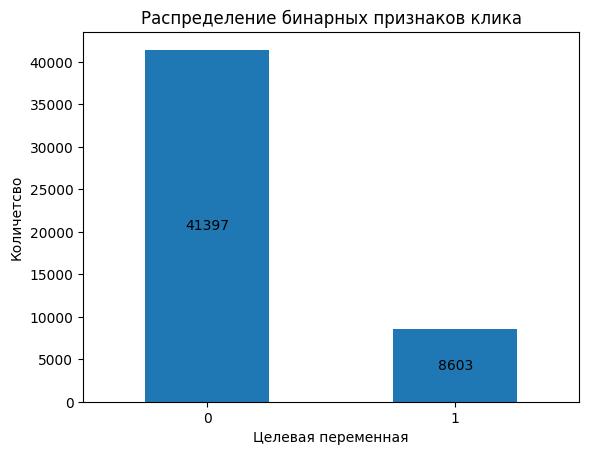

In [129]:
click_counts = original_df['click'].value_counts()

ax = click_counts.plot(
    kind='bar',
    title='Распределение бинарных признаков клика',
    xlabel='Целевая переменная',
    ylabel='Количетсво',
    rot=0
)

ax.bar_label(ax.containers[0], label_type='center')

plt.show()

In [130]:
print(f'Клика не было: {click_counts[0] / click_desc['count'] * 100:.0f}%')
print(f'Клик был: {click_counts[1] / click_desc['count'] * 100:.0f}%')

Клика не было: 83%
Клик был: 17%


В данных наблюдается сильный дисбаланс классов: 83% наблюдений относятся к классу без клика и только 6% - к классу с кликом по рекламе.

#### 2.3 Анализ признаков

In [131]:
temp_len = len(original_df)

In [132]:
original_df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,ml_feature_1,ml_feature_2,ml_feature_3,ml_feature_4,ml_feature_5,ml_feature_6,ml_feature_7,ml_feature_8,ml_feature_9,ml_feature_10
0,1.005263e+19,1,14102100,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,488a9a3e,31025cda,1,0,17614,320,50,1993,2,1063,-1,33,-0.996823,A,0.666588,0,0.817292,0.993275,Z,-0.619959,0.433666,0.274038
1,1.010597e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,75bb1b58,2ee63ff8,1,0,15701,320,50,1722,0,35,-1,79,-0.391309,C,5.146790,1,-0.883865,-0.825722,X,0.576526,-0.318558,-0.132851
2,1.012048e+19,0,14102100,1005,0,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,285263b0,d780319b,1,0,17914,320,50,2043,2,39,100084,32,-2.112732,D,7.169348,0,-0.859440,-0.338365,Y,-0.440047,-0.345412,0.340487
3,1.021995e+18,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,39cfef32,d9b5648e,0f2161f8,a99f214a,18190986,f4fffcd0,1,0,21611,320,50,2480,3,297,100111,61,0.332707,A,-0.290708,1,0.062795,0.062934,Y,0.551982,0.733382,-0.198542
4,1.023455e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b66e5482,a0f5f879,1,0,15702,320,50,1722,0,35,100084,79,1.166623,A,6.319133,1,-0.675276,0.797144,X,0.640827,0.297955,-0.136909


In [133]:
print('site_id:', original_df['site_id'].nunique())
print('site_domain:', original_df['site_domain'].nunique())

top_site_domains = original_df['site_domain'].value_counts().nlargest(100).index
original_df['site_domain_reduced'] = original_df['site_domain'].where(original_df['site_domain'].isin(top_site_domains), 'other')
coverage = original_df['site_domain'].isin(top_site_domains).mean()
print(f"Топ-100 site_domain покрывают {coverage:.1%} всех данных")

top_site_ids = original_df['site_id'].value_counts().nlargest(100).index
original_df['site_id_reduced'] = original_df['site_id'].where(original_df['site_id'].isin(top_site_ids), 'other')
coverage = original_df['site_id'].isin(top_site_ids).mean()
print(f"Топ-100 site_id покрывают {coverage:.1%} всех данных")

display(original_df[['site_id_reduced', 'site_domain_reduced']].phik_matrix(njobs=4))

print('app_id:', original_df['app_id'].nunique())
print('app_domain:', original_df['app_domain'].nunique())

top_app_ids = original_df['app_id'].value_counts().nlargest(100).index
original_df['app_id_reduced'] = original_df['app_id'].where(original_df['app_id'].isin(top_app_ids), 'other')
coverage = original_df['app_id'].isin(top_app_ids).mean()
print(f"Топ-100 app_id покрывают {coverage:.1%} всех данных")

display(original_df[['app_id_reduced', 'app_domain']].phik_matrix(njobs=4))

original_df = original_df.drop(columns=['app_id_reduced', 'site_domain_reduced', 'site_id_reduced'])

print('device_id:', original_df['device_id'].nunique())
print('device_ip:', original_df['device_ip'].nunique())

site_id: 1160
site_domain: 1013
Топ-100 site_domain покрывают 93.8% всех данных
Топ-100 site_id покрывают 91.0% всех данных


,site_id_reduced,site_domain_reduced
site_id_reduced,1.000000,0.999871
site_domain_reduced,0.999871,1.000000


app_id: 976
app_domain: 67
Топ-100 app_id покрывают 94.8% всех данных


,app_id_reduced,app_domain
app_id_reduced,1.000000,0.985105
app_domain,0.985105,1.000000


device_id: 8580
device_ip: 41455


Признаки, которые стоит удалить: 
1. Идентификаторы
- id - технический идентификатор. Удаляем, чтобы избежать переобучения.
2. Мультиколлинеарность
- site_domain (удаляем), оставляем site_id.
- app_domain (удаляем), оставляем app_id.

    Анализ корреляций показал почти идеальную зависимость (phik ~1.0) для двух пар. Это значит, что признаки дублируют друг друга. Оставляем только site_id и app_id как более детальные признаки.

3. Кардинальность
- device_id и device_ip - признаки с очень высокой кардинальностью (тысячи уникальных значений). Могут раздуть размерность модели и вызвать переобучение. 

Остальная фильтрация признаков будет на этапе просмотра корреляций.

In [134]:
df = original_df.copy()

def remove_useless_cols(df):
    return df.drop(columns=['id', 'site_domain', 'app_domain', 'device_id', 'device_ip'])

df = remove_useless_cols(df)

---

Удаление явных дубликатов

In [135]:
print('Число явных дубликатов:', df.duplicated().sum())

df = df.drop_duplicates()

Число явных дубликатов: 0


---

Создание копии датасета для EDA анализа

In [136]:
df_eda = df.copy()

---

Признак, требующий переработки: hour.

Формат YYMMDDHH модель воспримет как простое нарастающее число. Чтобы признак стал полезным, из него нужно выделить циклические составляющие. Например: час дня и день недели.

In [137]:
df_eda['datetime'] = pd.to_datetime(df_eda['hour'], format='%y%m%d%H')

df_eda['hour_of_day'] = df_eda['datetime'].dt.hour
df_eda['day_of_week'] = df_eda['datetime'].dt.dayofweek

df_eda = df_eda.drop(columns=['hour', 'datetime'])

print(df_eda[['hour_of_day', 'day_of_week']].head())

   hour_of_day  day_of_week
0            0            1
1            0            1
2            0            1
3            0            1
4            0            1


#### 2.4 Анализ пропущенных значений

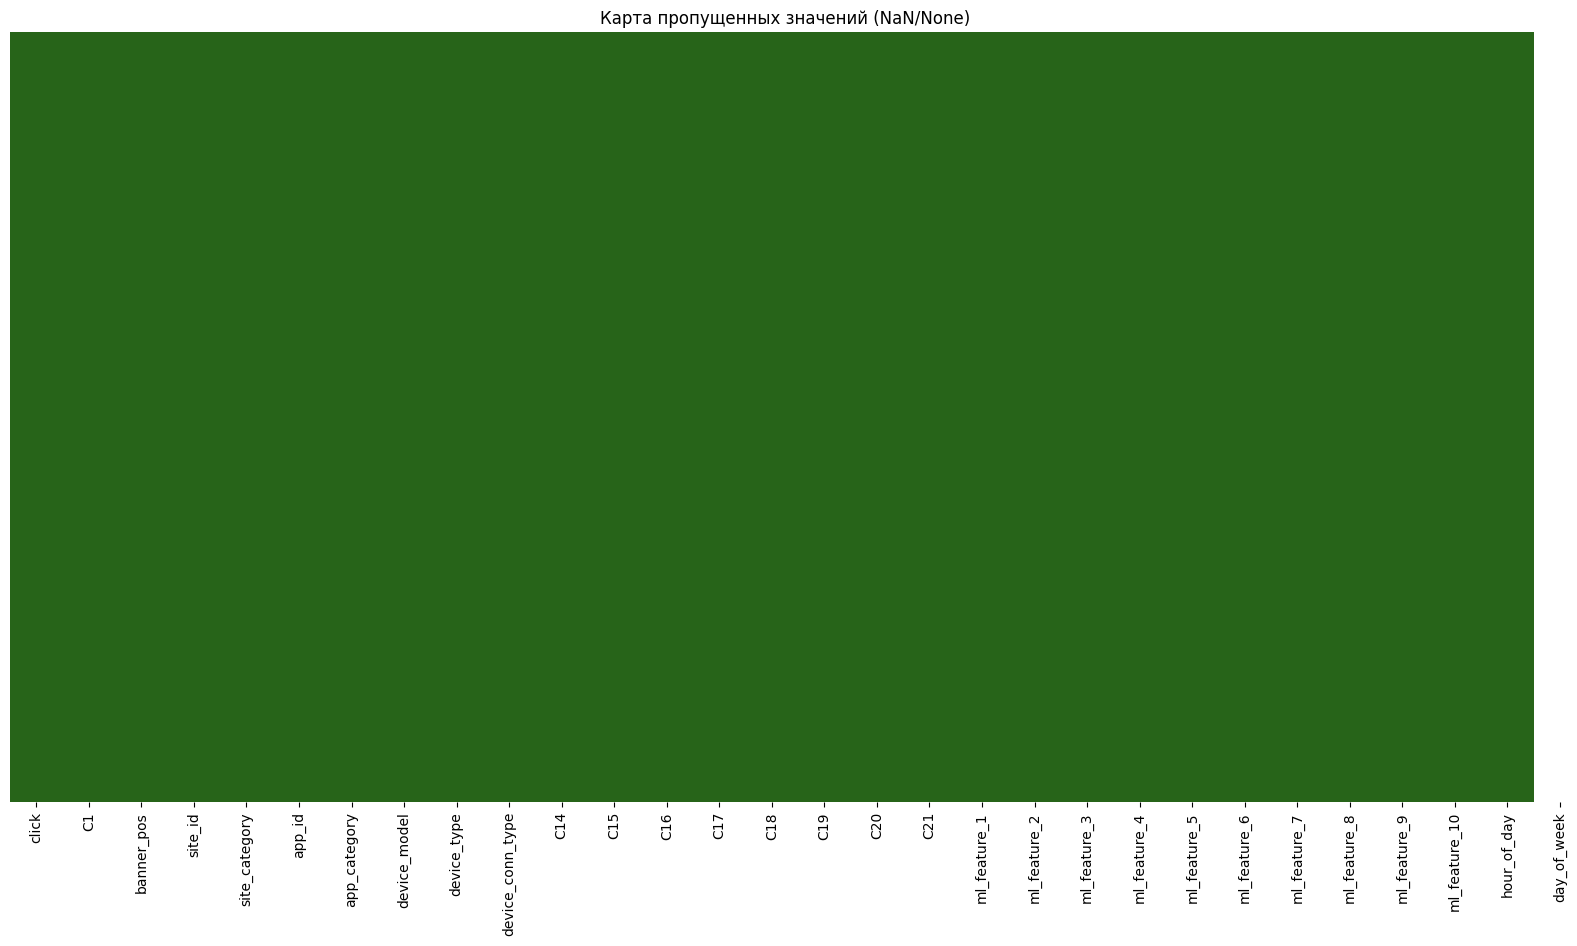

In [138]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df.isna().astype(int), yticklabels=False, cbar=False, cmap='PiYG_r', xticklabels=df_eda.columns)

plt.title("Карта пропущенных значений (NaN/None)")
plt.show()

Обработка пропущенных значений

In [139]:
def show_missing_stats(df):
    missing_stats = pd.DataFrame({
        'Кол-во пропусков': df.isna().sum(),
        'Доля пропусков': df.isna().mean() * 100
    })
    missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
    
    if missing_stats.empty:
        return "Пропусков в данных нет"
    
    return missing_stats \
            .sort_values(by='Кол-во пропусков', ascending=False) \
            .style.format({'Доля пропусков': '{:.2f}%'}) \
            .background_gradient(cmap='coolwarm')

show_missing_stats(df_eda)

'Пропусков в данных нет'

Пропусков в данных нет, заполнение не требуется.

#### 2.5 Анализ категориальных признаков

In [147]:
def check_cat_features(df):
    cat_df = df.select_dtypes(include=['object'])
    
    data = []
    for col in cat_df.columns:
        data.append({
            'Признак': col,
            'Уникальные значения': df[col].unique(),
            'Кол-во': df[col].nunique(),
        })
        
    return pd.DataFrame(data)

check_cat_features(df_eda)

,Признак,Уникальные значения,Кол-во
0,site_id,"[d9750ee7, 1fbe01fe, 85f751fd, 543a539e, e59ef...",1160
1,site_category,"[f028772b, 28905ebd, 50e219e0, 3e814130, 335d2...",18
2,app_id,"[ecad2386, 39cfef32, fbbccc58, 5e3f096f, cf032...",976
3,app_category,"[07d7df22, 0f2161f8, cef3e649, f95efa07, 8ded1...",22
4,device_model,"[31025cda, 2ee63ff8, d780319b, f4fffcd0, a0f5f...",2521
5,ml_feature_2,"[A, C, D, B, E]",5
6,ml_feature_7,"[Z, X, Y]",3


По результатам анализа категориальных признаков, кодирование через One-Hot Encoding будет только у признаков: ml_feature_2 и ml_feature_7, так как кол-во их уникальных значений <10. Остальные признаки будут кодироваться через Target Encoding.

#### 2.6 Анализ выбросов и распределений
- Проверьте, есть ли явные выбросы в числовых признаках.
- Опишите, как распределены выбросы — нормально, асимметрично, каким-то другим образом.

In [148]:
df.head()

,click,hour,C1,banner_pos,site_id,site_category,app_id,app_category,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,ml_feature_1,ml_feature_2,ml_feature_3,ml_feature_4,ml_feature_5,ml_feature_6,ml_feature_7,ml_feature_8,ml_feature_9,ml_feature_10
0,1,14102100,1005,1,d9750ee7,f028772b,ecad2386,07d7df22,31025cda,1,0,17614,320,50,1993,2,1063,-1,33,-0.996823,A,0.666588,0,0.817292,0.993275,Z,-0.619959,0.433666,0.274038
1,0,14102100,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,2ee63ff8,1,0,15701,320,50,1722,0,35,-1,79,-0.391309,C,5.146790,1,-0.883865,-0.825722,X,0.576526,-0.318558,-0.132851
2,0,14102100,1005,0,d9750ee7,f028772b,ecad2386,07d7df22,d780319b,1,0,17914,320,50,2043,2,39,100084,32,-2.112732,D,7.169348,0,-0.859440,-0.338365,Y,-0.440047,-0.345412,0.340487
3,0,14102100,1005,0,85f751fd,50e219e0,39cfef32,0f2161f8,f4fffcd0,1,0,21611,320,50,2480,3,297,100111,61,0.332707,A,-0.290708,1,0.062795,0.062934,Y,0.551982,0.733382,-0.198542
4,0,14102100,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,a0f5f879,1,0,15702,320,50,1722,0,35,100084,79,1.166623,A,6.319133,1,-0.675276,0.797144,X,0.640827,0.297955,-0.136909


In [149]:
df_eda.describe()

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,ml_feature_1,ml_feature_3,ml_feature_4,ml_feature_5,ml_feature_6,ml_feature_8,ml_feature_9,ml_feature_10,hour_of_day,day_of_week
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.172060,1004.970060,0.291380,1.018120,0.337160,18826.648680,318.86640,59.692480,2109.781020,1.428100,227.703800,53173.383240,83.685180,-0.002445,-0.036381,0.498040,0.034729,0.022948,0.025465,0.035361,0.020226,11.221500,2.597720
std,0.377436,1.110202,0.514201,0.538477,0.860057,4983.064178,20.56153,46.720842,612.963141,1.327413,351.592108,49960.181871,70.539513,1.000280,5.792335,0.500001,1.002116,0.656690,0.578026,0.505034,0.303309,5.938008,1.727041
min,0.000000,1001.000000,0.000000,0.000000,0.000000,375.000000,120.00000,20.000000,112.000000,0.000000,33.000000,-1.000000,13.000000,-4.631262,-9.999742,0.000000,-4.631853,-1.000000,-0.999965,-2.147526,-1.287965,0.000000,0.000000
25%,0.000000,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.00000,50.000000,1823.000000,0.000000,35.000000,-1.000000,23.000000,-0.677784,-5.059555,0.000000,-0.639829,-0.579775,-0.470627,-0.304077,-0.182386,6.000000,1.000000
50%,0.000000,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.00000,50.000000,2323.000000,2.000000,39.000000,100049.000000,61.000000,-0.003776,-0.056155,0.000000,0.028112,0.037786,0.027348,0.035985,0.018930,11.000000,2.000000
75%,0.000000,1005.000000,1.000000,1.000000,0.000000,21916.000000,320.00000,50.000000,2526.000000,3.000000,171.000000,100094.000000,108.000000,0.673534,4.985939,1.000000,0.707594,0.637131,0.521117,0.374152,0.224080,16.000000,4.000000
max,1.000000,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.00000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,3.793828,9.999975,1.000000,4.230623,1.000000,1.119858,2.120786,1.202300,23.000000,6.000000


In [184]:
discrete_cols = ['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C18', 'C15', 'C16', 'ml_feature_4', 'hour_of_day', 'day_of_week']

def get_df_without_discrete(df, discrete_cols):
    for col in discrete_cols:
        if col in df.columns:
            df = df.drop(columns=col)

    return df

In [185]:
def create_df_boxplot(df, col=None, ax=None):
    data = df if col is None else df[col]
    
    if ax is None:
        _, ax = plt.subplots(figsize=(14, 8))
        standalone = True
    else:
        standalone = False
    
    sns.boxplot(data=data, ax=ax)
    
    title = 'Размах значений признака'
    if col is not None:
        title += f': {col}'

    ax.set_title(title)
    ax.set_ylabel('Значение признака')

    ax.grid(True)
    ax.tick_params(axis='x', rotation=30)
    
    if standalone:
        return plt.show()

    return ax

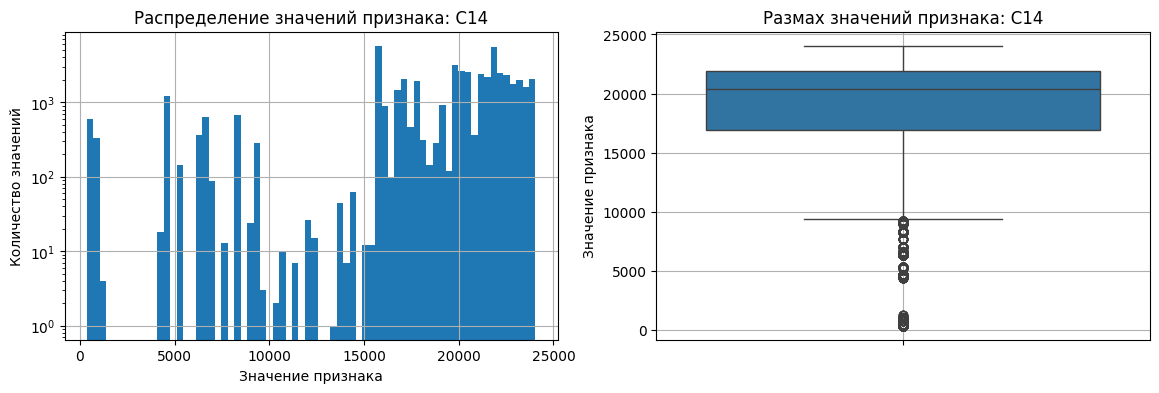

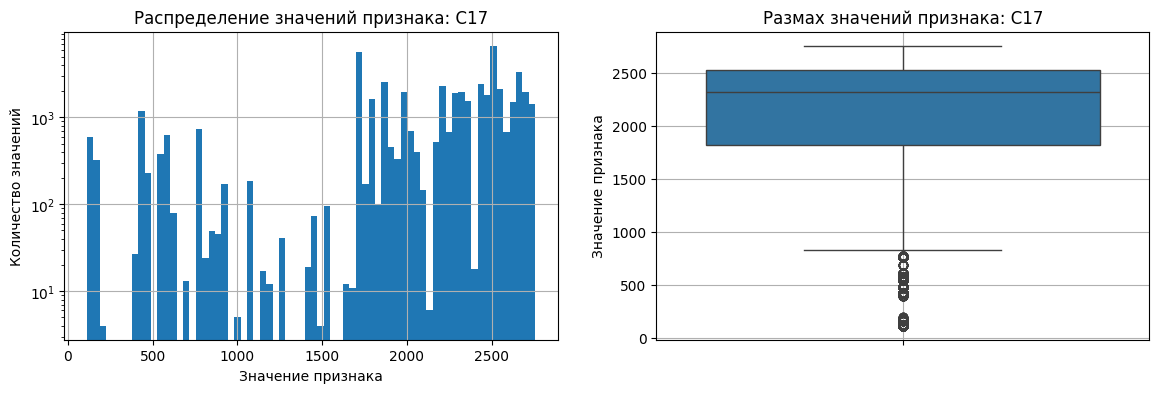

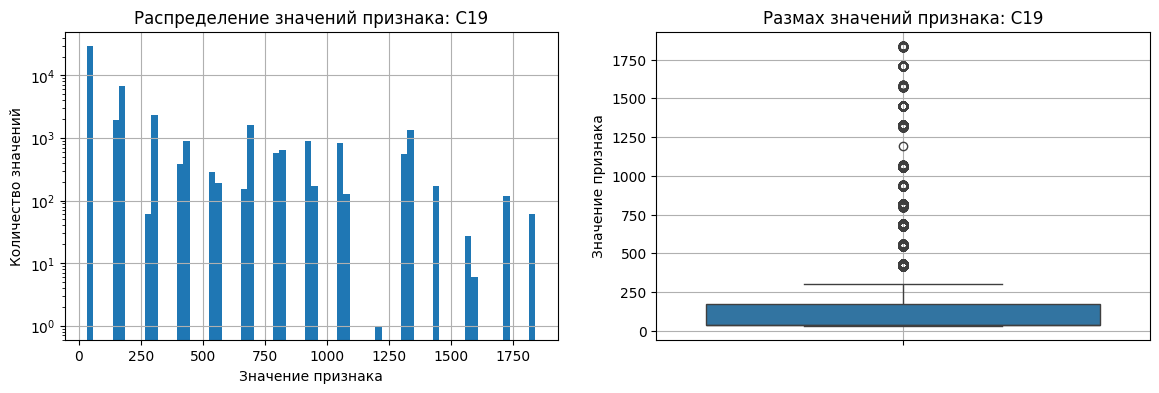

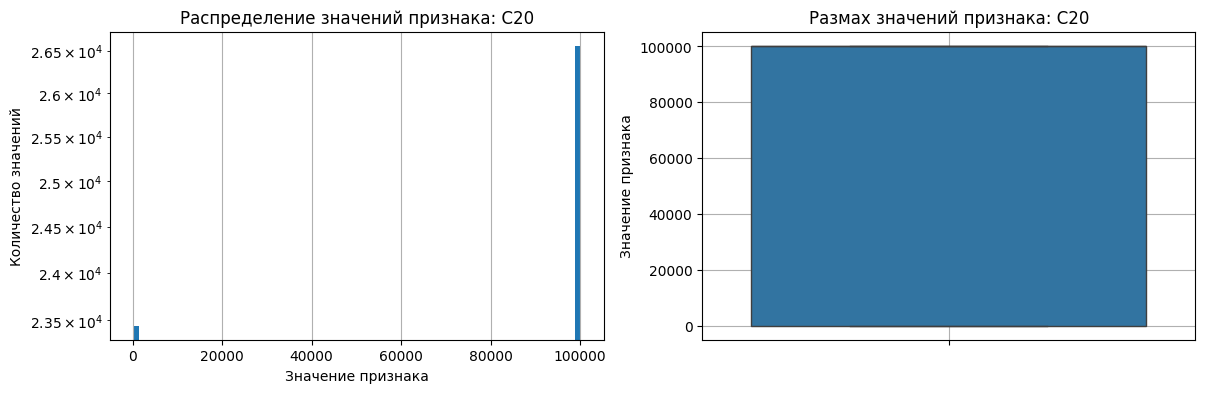

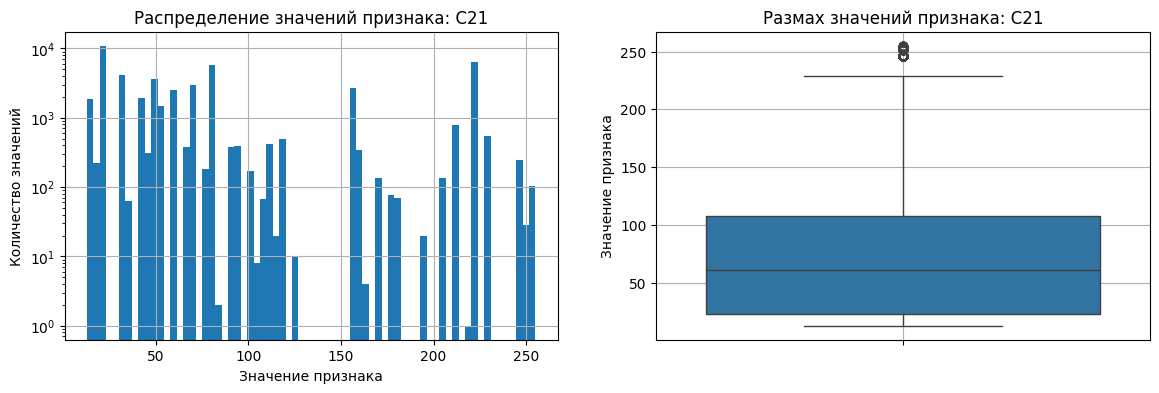

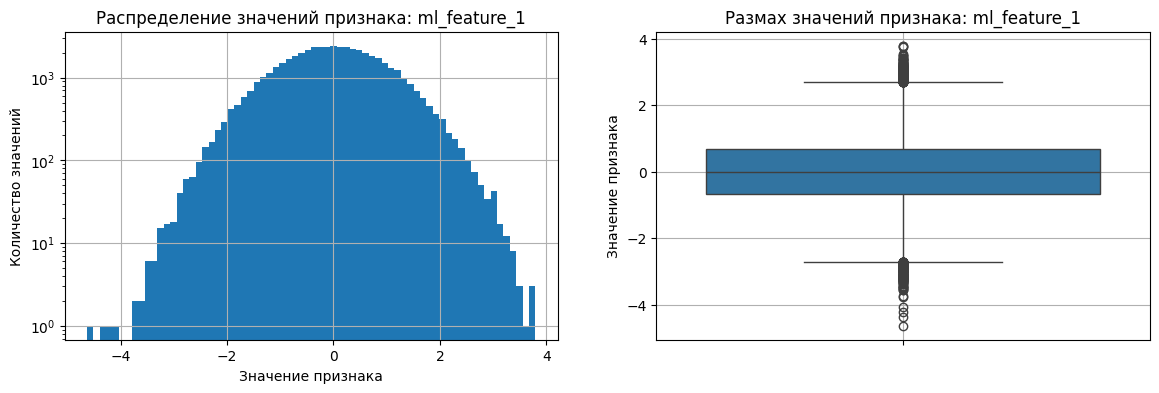

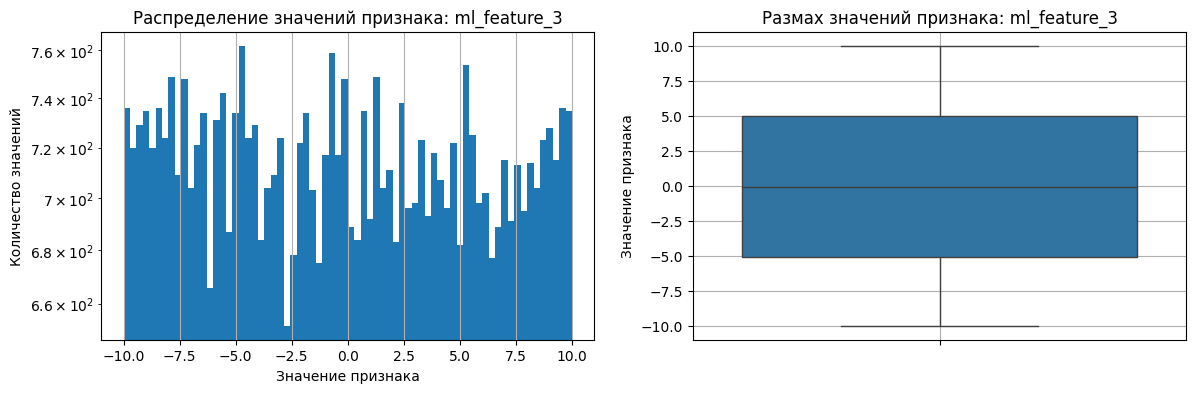

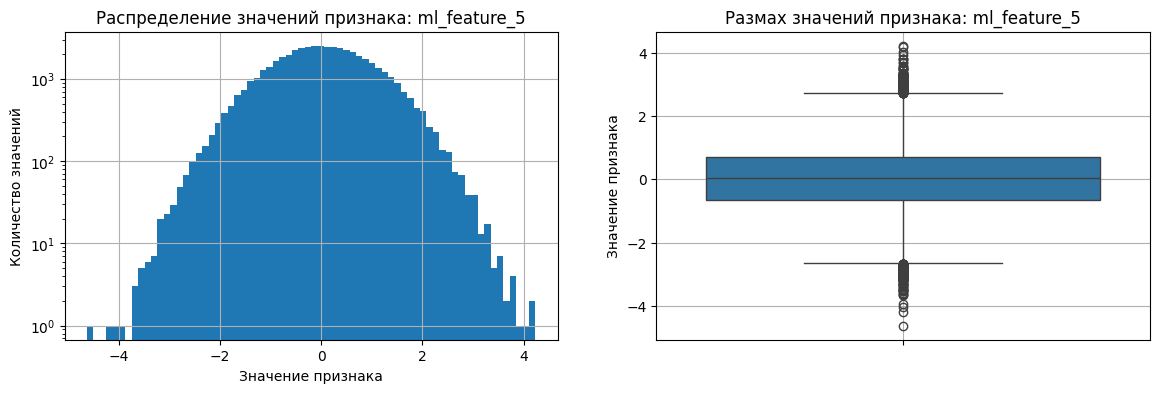

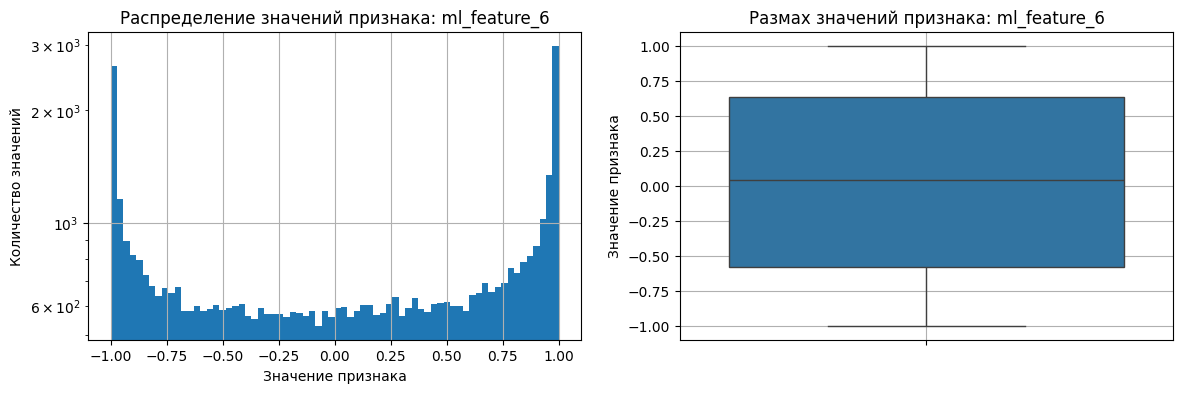

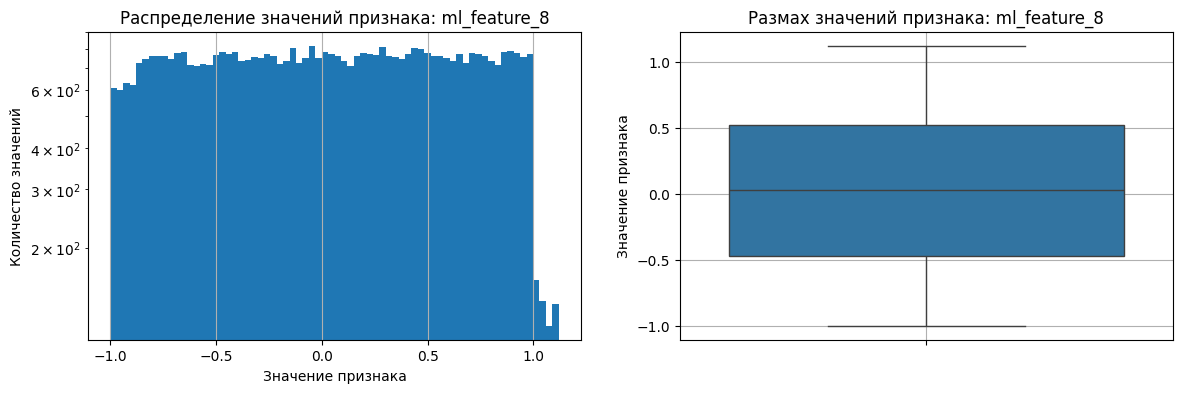

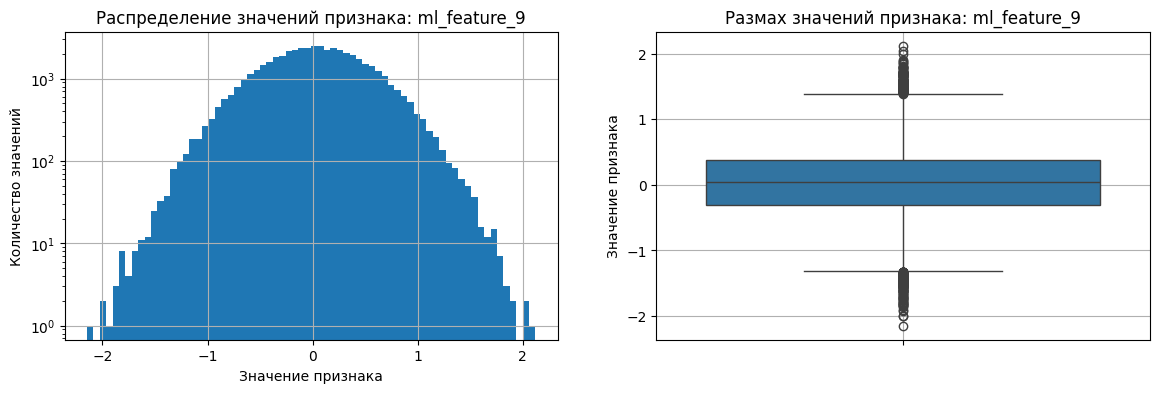

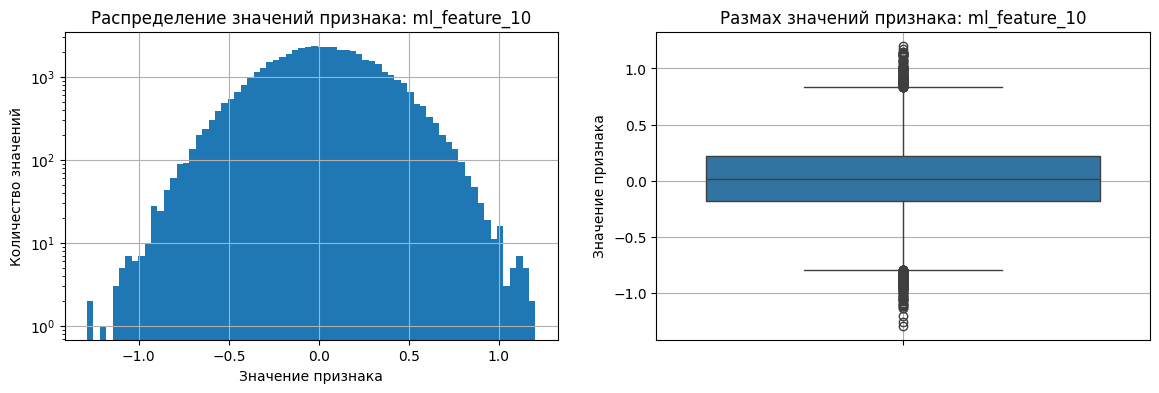

In [186]:
def get_emission_analysis(df):
    num_df = df.select_dtypes(include=['number'])
    
    for col in num_df.columns:
        _, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

        hist = axes[0]
        num_df[col].plot(
            kind='hist',
            bins=70,
            grid=True,
            ax=hist
        )

        hist.set_title(f'Распределение значений признака: {col}')
        hist.set_xlabel('Значение признака')
        hist.set_ylabel('Количество значений')
        hist.set_yscale('log')

        create_df_boxplot(num_df, col, axes[1])

        plt.show()
        
        plt.close()

interval_df = get_df_without_discrete(df_eda, discrete_cols)
get_emission_analysis(interval_df)

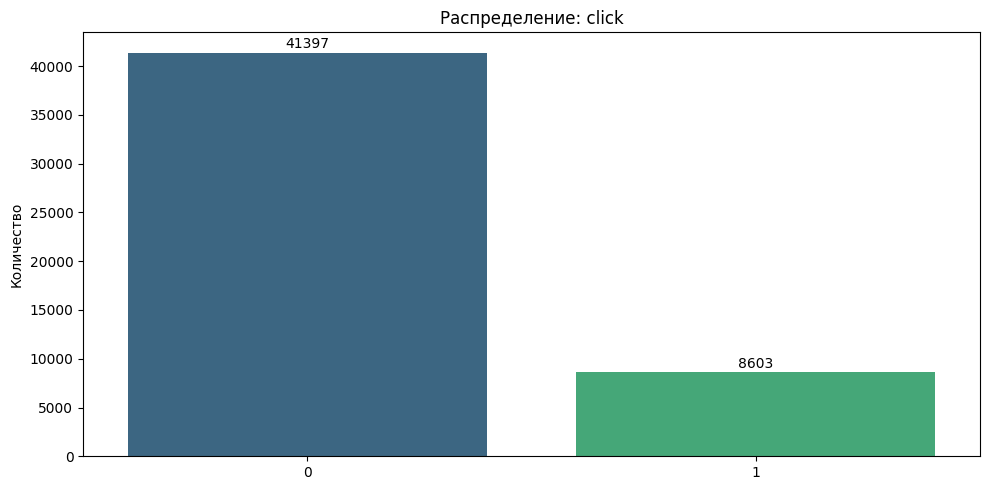

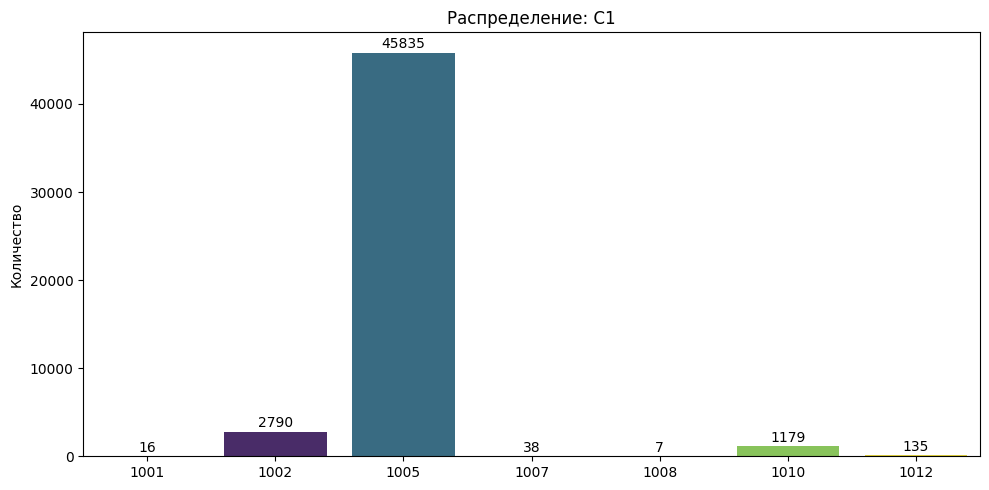

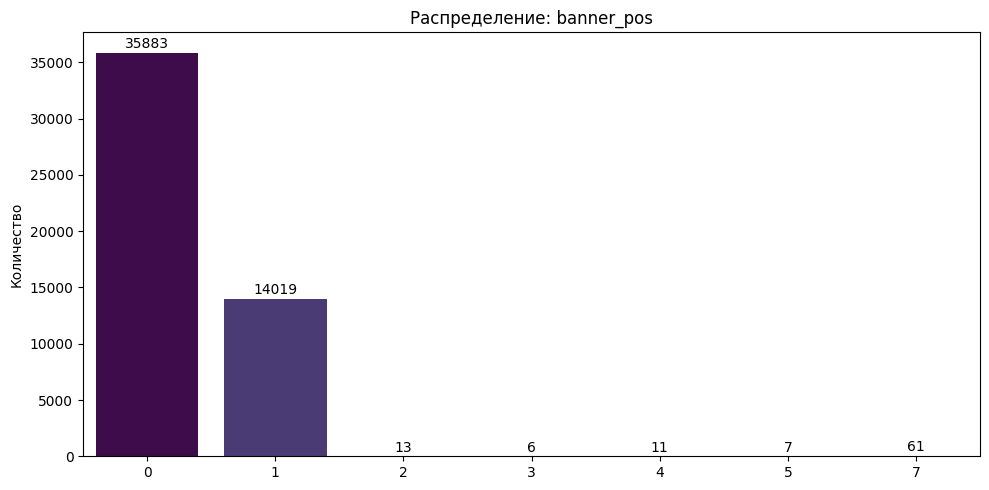

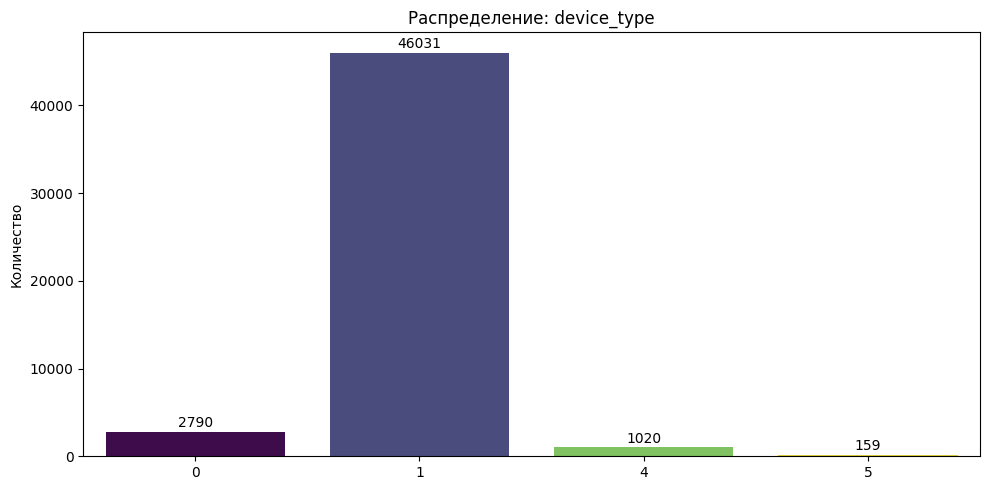

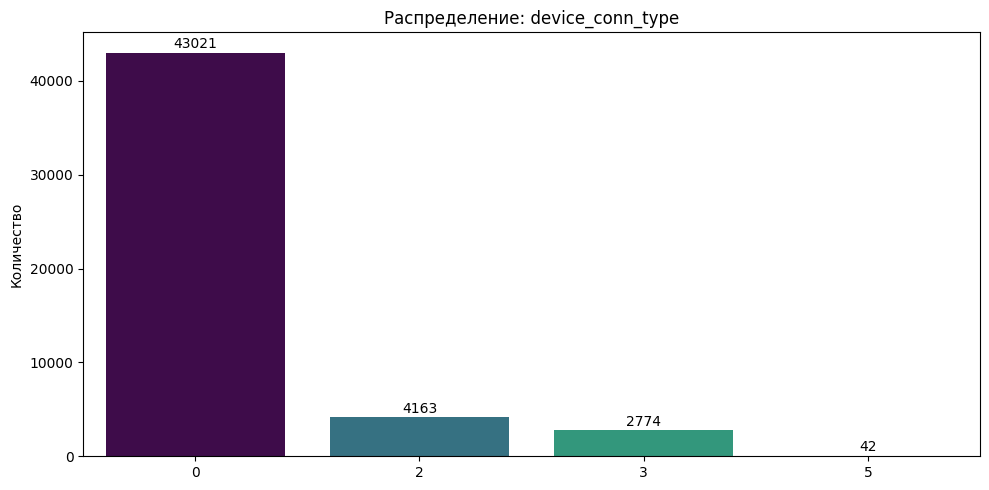

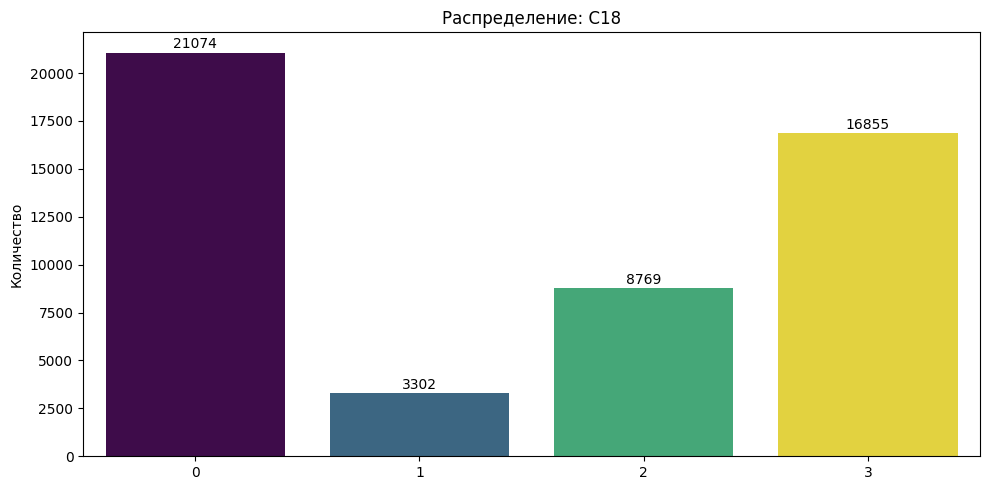

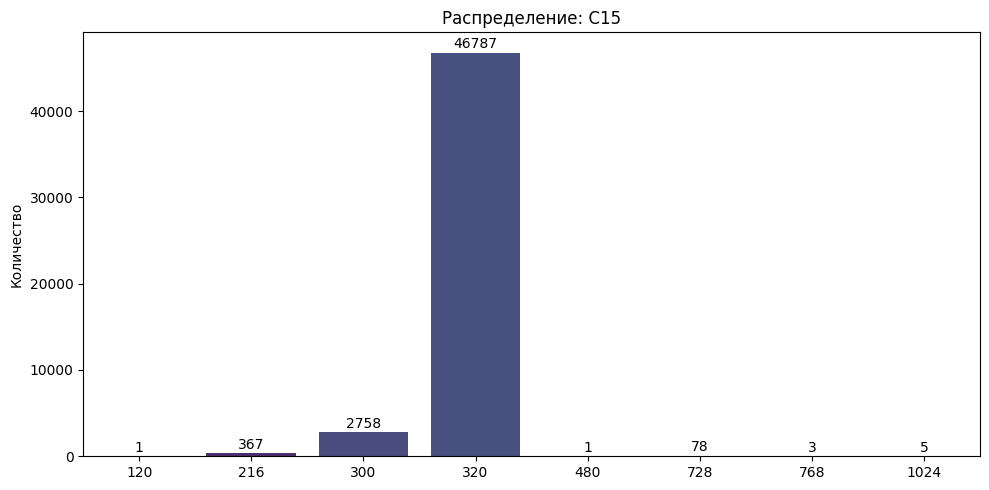

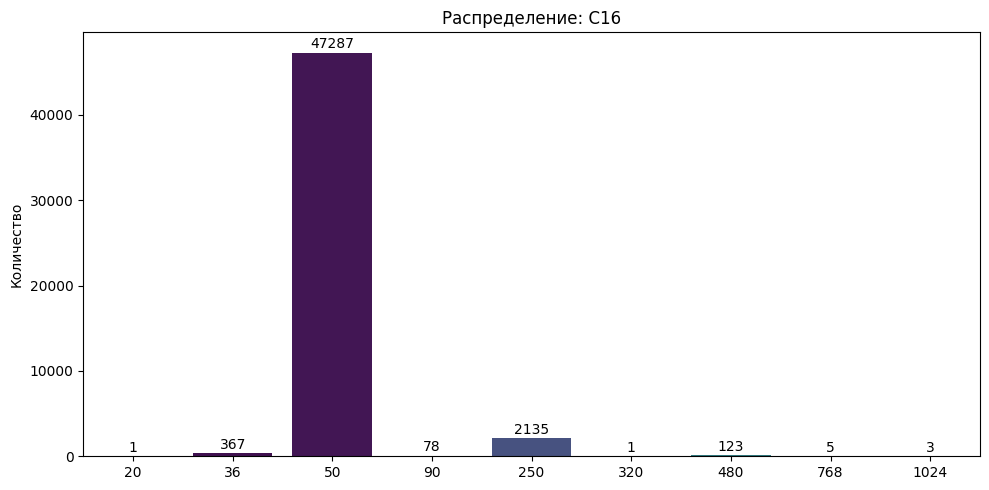

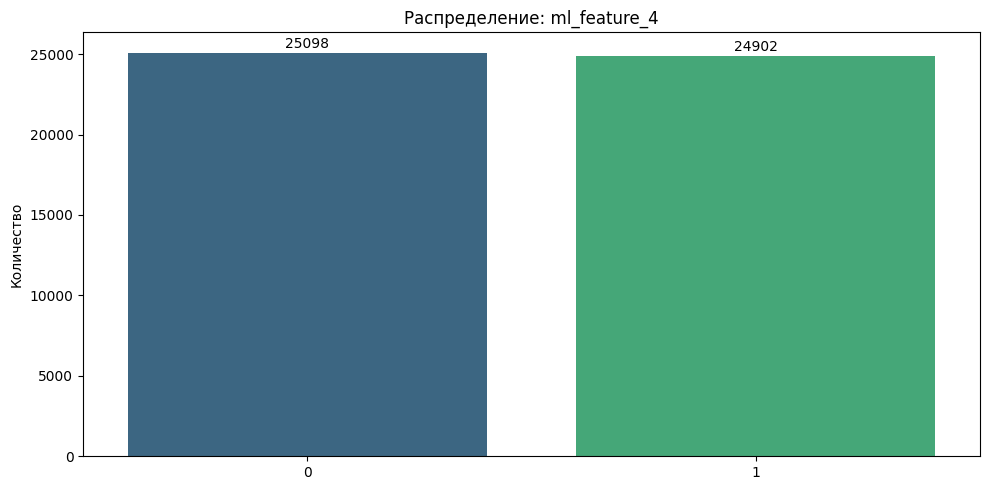

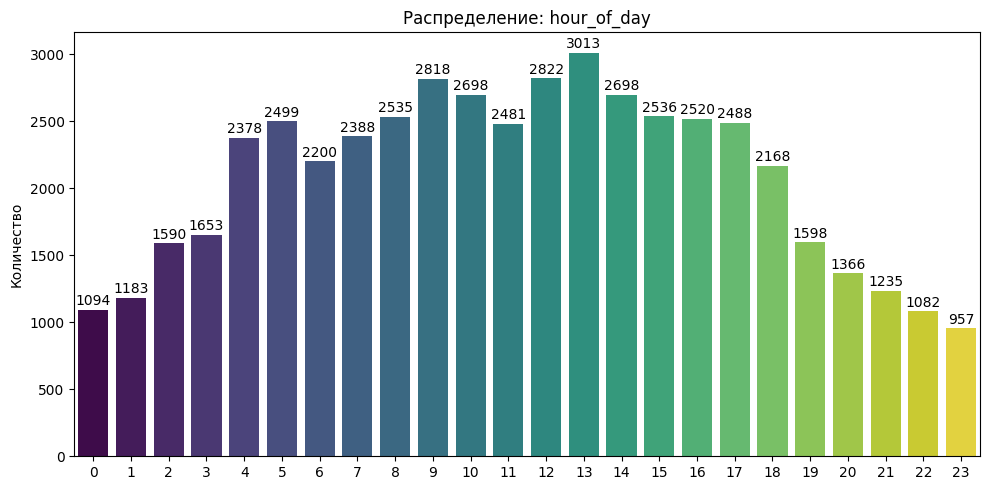

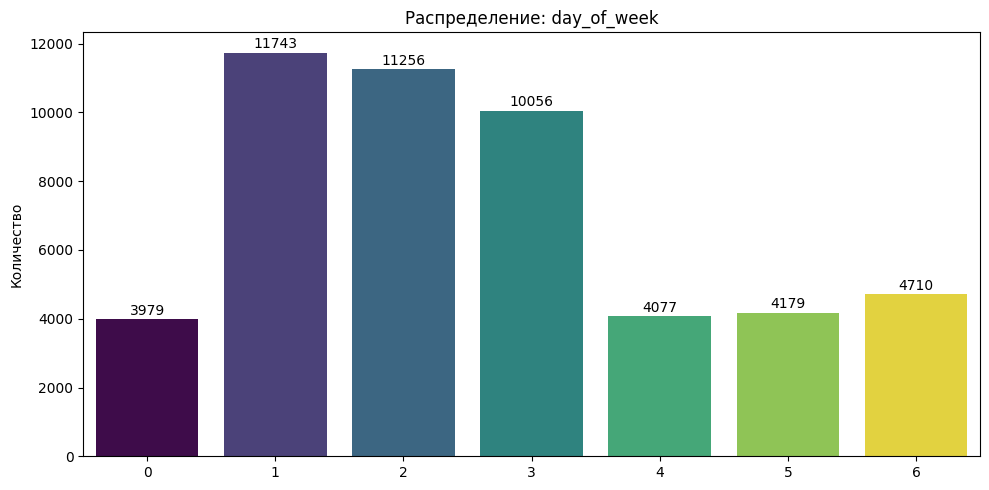

In [187]:
valid_features = [f for f in discrete_cols if f in df_eda.columns]

for _, feature in enumerate(valid_features):
    plt.figure(figsize=(10, 5)) 
    
    ax = sns.countplot(
        x=feature, 
        data=df_eda,
        hue=feature, 
        legend=False,
        palette='viridis'
    )
    
    plt.title(f'Распределение: {feature}')
    plt.xlabel('') # в title данная информация уже есть
    plt.ylabel('Количество')

    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=1)

    plt.tight_layout()
    plt.show()
    
    plt.close()

#### 2.7 Корреляции
- Определите, какие признаки коррелируют с целевой переменной.
- Выявите сильно скоррелированные признаки, которые можно удалить, если такие есть.


#### 2.8 Выводы по EDA
- Кратко опишите ключевые находки.
- Выберите признаки, которые выглядят наиболее перспективными для модели. Выбор обоснуйте.
- Определите действия по предобработке данных, которые необходимо проделать.

## 3. Разделение данных на выборки

#### 3.1 Разделите данные
- Сначала отделите тестовую выборку, в ней должно быть 20% данных.
- Оставшиеся 80% данных используйте для обучения.
- Используйте стратифицированное разделение, чтобы сохранить баланс классов.
- **Не используйте тестовую выборку до финального тестирования!**

#### 3.2 Проверьте разделение
- Убедитесь, что распределение целевой переменной сохранено в каждой выборке.
- Выведите размеры выборок.

## 4. Предобработка данных — построение пайплайнов

#### 4.1 Создайте пайплайн для предобработки данных

**Для числовых признаков:**
- Корректно заполните пропуски — средним, медианой или другим методом.
- Масштабируйте данные с помощью `StandardScaler`.
- Обработайте выбросы, если необходимо.

**Для категориальных признаков:**
- Корректно заполните пропуски — значением по умолчанию или модой.
- Примените кодирование:
  - One-Hot Encoding для признаков с малой кардинальностью.
  - Target Encoding для признаков с высокой кардинальностью.

#### 4.2 Объедините пайплайны
- Используйте `sklearn.pipeline.Pipeline` и `ColumnTransformer`.
- **Важно:** используйте информацию о пропусках и категориях только из обучающей выборки!

## 5. Отбор признаков

#### 5.1 Примените фильтрационные методы
- Посчитайте корреляцию каждого признака с целевой переменной.
- Отберите топ лучших признаков. Объясните, почему остановились именно на таком количестве признаков.
- Удалите признаки с очень низкой вариацией `VarianceThreshold`.

#### 5.2 Примените методы-обёртки
- Используйте методы-обёртки для поиска оптимального набора признаков.

#### 5.3 Выберите финальный набор признаков
- Объедините результаты методов.
- Выберите признаки, которые прошли фильтрацию.

## 6. Обучение базовой модели

### 6.1 Обучите `DummyClassifier`
- Это нужно, чтобы обозначить самый простой базовый уровень работы модели.

### 6.2 Обучите `LogisticRegression`
- Используйте для обучения отобранные признаки.
- Примените кросс-валидацию на 5 фолдах.
- Посчитайте метрику PR-AUC. При необходимости дополнительно рассчитайте Precision, Recall и F1-score.
- Напоминаем, что для корректной кросс-валидации, предобработку нужно объединить с классификатором в Pipeline.

### 6.3 Обучите `SVC`
- Обучите SVC линейным ядром.
- Примените кросс-валидацию на 5 фолдах и посчитайте ту же метрику PR-ROC. При необходимости дополнительно рассчитайте Precision, Recall и F1-score.
- Калибровку модели мы проведём далее, поэтому здесь нужна модель `probability=False`

### 6.4 Сравните модели
- Убедитесь, что `LogisticRegression` работает лучше `DummyClassifier`.
- Сравните качество `LogisticRegression` с `SVC`.

## 7. Подбор гиперпараметров: Grid Search с кросс-валидацией

#### 7.1 Определите сетку гиперпараметров
Определите ключевые параметры, которые влияют на качество моделей `LogisticRegression` и `SVC`.

#### 7.2 Примените Grid Search
- Используйте `GridSearchCV` для перебора всех комбинаций.
- Используйте `scoring='average_precision'`.
- Выведите лучшие параметры и их метрики.

#### 7.3 Составьте таблицу результатов
- Покажите топ-10 конфигураций с их метриками.

## 8. Финальная модель

#### 8.1 Обучите финальную модель
- Используйте лучшие параметры из Grid Search.
- Обучите модели на всей обучающей выборке.

#### 8.2 Посчитайте метрики на тестовой выборке
- Необходимые метрики:
  - PR-AUC.
  - Оценка Бриера.
  - Дополнительные метрики при необходимости.

#### 8.3 Проанализируйте веса модели
- Выведите самые важные признаки по модулю коэффициентов.
- Интерпретируйте результаты.

## 9. Калибровка модели

#### 9.1 Проверьте текущую калибровку
- Постройте калибровочную кривую, используйте `sklearn.calibration.calibration_curve`.
- Для обработки «сырых» значений SVC, нужно применить стандартную (необученную) сигмоиду для получения [0, 1].

#### 9.2 Примените методы калибровки
- Используйте `CalibratedClassifierCV` с методом `'isotonic'`.
- **Важно:** используйте для процедуры отдельную калибровочную выборку!

#### 9.3 Сравните модели до и после калибровки
- Посчитайте оценки Бриера для моделей до и после калибровки.
- Дополнительно можете рассчитать ECE и MCE для моделей до и после калибровки.
- Визуализируйте калибровочные кривые для моделей до и после калибровки.

## 10. Оценка качества калибровки

#### 10.1 Посчитайте метрики калибровки
- Оценка Бриера — средняя ошибка предсказанной вероятности.
- Дополнительная метрика ECE: среднее расхождение вероятностей.
- Дополнительная метрика MCE: максимальное расхождение вероятностей.

#### 10.2 Сравните модели до и после калибровки
- Выведите все метрики в одной таблице.
- Сделайте вывод о том, улучшила ли калибровка качество моделей.

## 11. Финальный отчёт и выводы

### 11.1 Сведите все результаты в таблицу

Покажите:
- Характеристики базовой модели `DummyClassifier`.
- Характеристики финальной модели.
- Метрики до и после калибровки.
- Топ-5 самых важных признаков.

### 11.2 Напишите выводы

Ответьте на вопросы:
- Улучшилось ли качество модели по сравнению с базовой?
- Какие признаки больше всего влияют на вероятность клика?
- Насколько хорошо модель откалибрована?
- Готова ли модель к использованию в продакшене?

### 11.3 Рекомендации

- Какие возможности улучшения модели вы видите?

## 12. Сохранение модели для продакшена

### 12.1 Сохраните артефакты

Сохраните:
1. пайплайн предобработки данных `preprocessor`;
2. финальную модель `calibrated_model`;
3. информацию о выбранных признаках.

### 12.2 Проверьте работоспособность вашего кода

- Загрузите сохранённые артефакты.
- Сделайте предсказания на новых данных.
- Убедитесь, что результаты совпадают.